In [1]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk
import matplotlib.pylab as plt


In [80]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        if label == '10-4':
            data_pd_i['Concentration'] = '1 * $10^{-4}$M'
        if label == '10-5':
            data_pd_i['Concentration'] = '1 * $10^{-5}$M'
        if label == '10-6':
            data_pd_i['Concentration'] = '1 * $10^{-6}$M'
        if label == '10-7':
            data_pd_i['Concentration'] = '1 * $10^{-7}$M'
        if label == 'Control':
            data_pd_i['Concentration'] = 'Control'


        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [81]:

# folder_path = "C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv"
folder_path = 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted'

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

['C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\19-07-2023  GA-477.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\19-07-2023 Amb.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\21-07-2023 AMB-UV.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\21-07-2023 GA477 UV.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\520, 533, 614 - бланк вычтен руками.txt', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\Amb.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-418 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-477 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\Images.pptx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\PGA-357.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\PGA-418.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv\\GA-520.csv', 'C:\\Users\\Mod

In [82]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   if '.csv' in file_name_ext:
      print(file)
      file_raw = pd.read_csv(file) 
   
   if '.xlsx' in file_name_ext:
      file_raw = pd.read_excel(file) 

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

print(data_pd)

C:\Users\Modern\Desktop\Бельская\Converted\19-07-2023  GA-477.csv
C:\Users\Modern\Desktop\Бельская\Converted\19-07-2023 Amb.csv
C:\Users\Modern\Desktop\Бельская\Converted\21-07-2023 AMB-UV.csv
C:\Users\Modern\Desktop\Бельская\Converted\21-07-2023 GA477 UV.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\GA-520.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\GA-533.csv
C:\Users\Modern\Desktop\Бельская\Converted\csv\GA-614.csv
       OD Cell_type           Substance   Concentration
0   0.169      Vero  19-07-2023  GA-477  1 * $10^{-4}$M
1   0.156      Vero  19-07-2023  GA-477  1 * $10^{-4}$M
2   0.163      Vero  19-07-2023  GA-477  1 * $10^{-4}$M
3   0.160      Vero  19-07-2023  GA-477  1 * $10^{-4}$M
4   0.164      Vero  19-07-2023  GA-477  1 * $10^{-4}$M
..    ...       ...                 ...             ...
19  0.155      Vero              GA-614         Control
20  0.147      Vero              GA-614         Control
21  0.160      Vero              GA-614         Control
22  0.

<AxesSubplot: xlabel='Substance', ylabel='OD'>

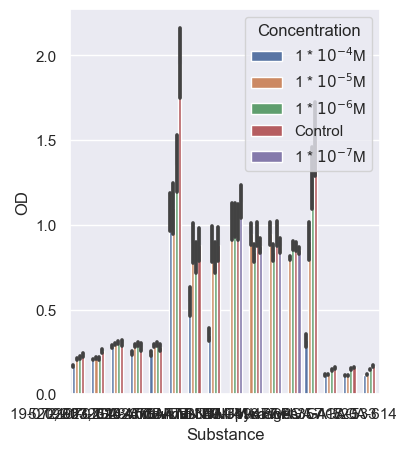

In [83]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Blank subtraction

In [84]:
unique_substances= data_pd['Concentration'].unique()

unique_concentrations= data_pd['Substance'].unique()

print(unique_substances)

print(unique_concentrations)



['1 * $10^{-4}$M' '1 * $10^{-5}$M' '1 * $10^{-6}$M' 'Control'
 '1 * $10^{-7}$M']
['19-07-2023  GA-477' '19-07-2023 Amb' '21-07-2023 AMB-UV'
 '21-07-2023 GA477 UV' '520, 533, 614 - бланк вычтен руками' 'Amb'
 'BNTM-349 UV' 'BNTM-349' 'BNTM-418 UV' 'BNTM-477 UV' 'Images' 'PGA-357'
 'PGA-418' 'GA-520' 'GA-533' 'GA-614']


In [85]:
data_extracted_substance = data_pd[(data_pd['Substance'] == '21-07-2023 GA477 UV')].copy() 

#Ugly thing for blanks subtraction

# high_concentration_OD = data_pd[(data_pd['Concentration'] == '10-4') & (data_pd['Substance'] == '21-07-2023 GA477 UV')].mean()

# print(high_concentration_OD)

# blank = high_concentration_OD.iloc[0]

# data_extracted_substance['OD_blank_correcetd'] = data_extracted_substance['OD'] - blank

print(data_extracted_substance)



       OD Cell_type            Substance   Concentration
0   0.298      Vero  21-07-2023 GA477 UV  1 * $10^{-4}$M
1   0.195      Vero  21-07-2023 GA477 UV  1 * $10^{-4}$M
2   0.191      Vero  21-07-2023 GA477 UV  1 * $10^{-4}$M
3   0.188      Vero  21-07-2023 GA477 UV  1 * $10^{-4}$M
4   0.236      Vero  21-07-2023 GA477 UV  1 * $10^{-4}$M
..    ...       ...                  ...             ...
19  0.222      Vero  21-07-2023 GA477 UV         Control
20  0.316      Vero  21-07-2023 GA477 UV         Control
21  0.294      Vero  21-07-2023 GA477 UV         Control
22  0.383      Vero  21-07-2023 GA477 UV         Control
23  0.323      Vero  21-07-2023 GA477 UV         Control

[96 rows x 4 columns]


Recalculation to relative values:

In [86]:
# data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_extracted_substance[(data_extracted_substance['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD    Relative            Substance   Concentration Cell_type
0   0.298  107.387387  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
1   0.195   70.270270  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
2   0.191   68.828829  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
3   0.188   67.747748  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
4   0.236   85.045045  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
..    ...         ...                  ...             ...       ...
19  0.222   80.000000  21-07-2023 GA477 UV         Control      Vero
20  0.316  113.873874  21-07-2023 GA477 UV         Control      Vero
21  0.294  105.945946  21-07-2023 GA477 UV         Control      Vero
22  0.383  138.018018  21-07-2023 GA477 UV         Control      Vero
23  0.323  116.396396  21-07-2023 GA477 UV         Control      Vero

[96 rows x 5 columns]


In [87]:

# extracted_data = data[(data['Substance'] == '19-07-2023  GA-477')].copy()
# print(data)

unique_concentrations= data['Concentration'].unique()
unique_substances= data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)


[(('21-07-2023 GA477 UV', '1 * $10^{-4}$M'), ('21-07-2023 GA477 UV', 'Control')), (('21-07-2023 GA477 UV', '1 * $10^{-5}$M'), ('21-07-2023 GA477 UV', 'Control')), (('21-07-2023 GA477 UV', '1 * $10^{-6}$M'), ('21-07-2023 GA477 UV', 'Control')), (('21-07-2023 GA477 UV', 'Control'), ('21-07-2023 GA477 UV', 'Control'))]


       OD    Relative            Substance   Concentration Cell_type
0   0.298  107.387387  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
1   0.195   70.270270  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
2   0.191   68.828829  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
3   0.188   67.747748  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
4   0.236   85.045045  21-07-2023 GA477 UV  1 * $10^{-4}$M      Vero
..    ...         ...                  ...             ...       ...
19  0.222   80.000000  21-07-2023 GA477 UV         Control      Vero
20  0.316  113.873874  21-07-2023 GA477 UV         Control      Vero
21  0.294  105.945946  21-07-2023 GA477 UV         Control      Vero
22  0.383  138.018018  21-07-2023 GA477 UV         Control      Vero
23  0.323  116.396396  21-07-2023 GA477 UV         Control      Vero

[96 rows x 5 columns]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.

(<AxesSubplot: ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x168fdd9d630>])

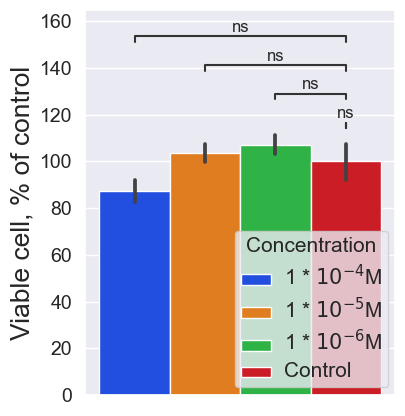

In [88]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration',palette='bright')

print(data)

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,5)})

ax.legend(loc='lower right', title='Concentration')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15') 

ax.set(xlabel=None, ylabel='Viable cell, % of control')
ax.set(xticklabels=[])
ax.yaxis.get_label().set_fontsize(19)
ax.xaxis.get_label().set_fontsize(19)
ax.tick_params(axis='y', which='major', labelsize=14)

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

